#Emotion Recognition from Text

# **Importing Libraries**  
We import the necessary libraries to manipulate data and visualize the results.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading the dataset
We retrieve the data from Google Cloud Storage using the `gsutil` command.

In [ ]:
!gsutil cp -r gs://gresearch/goemotions/data/full_dataset/ .

Copying gs://gresearch/goemotions/data/full_dataset/goemotions_1.csv...
Copying gs://gresearch/goemotions/data/full_dataset/goemotions_2.csv...
Copying gs://gresearch/goemotions/data/full_dataset/goemotions_3.csv...
- [3 files][ 40.8 MiB/ 40.8 MiB]                                                
Operation completed over 3 objects/40.8 MiB.                                     


# Loading the data  
We read the CSV file containing the dataset and display it to check its content.


In [ ]:

df = pd.read_csv("/content/full_dataset/goemotions_1.csv")
display(df)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,"It's about fucking time, hope this is real.",eeuoyeh,DudeImMacGyver,worldnews,t3_ajcbgq,t3_ajcbgq,1.548346e+09,19,False,0,...,0,0,0,0,0,0,0,0,0,0
69996,This is great! Can anyone make a request with ...,eer0igi,Dirkus777,gay,t3_aiqhx1,t3_aiqhx1,1.548223e+09,55,False,1,...,0,0,0,0,0,0,0,0,0,0
69997,I’m sorry. Can you please explain what are the...,eebxspf,menjav,DebateAnAtheist,t3_ah451r,t1_eeblb39,1.547787e+09,5,False,0,...,0,0,0,0,0,0,0,0,0,0
69998,No but it should be,edjf4v2,heputmystuffinjello,DunderMifflin,t3_adpkeq,t1_edjasoe,1.546922e+09,51,False,0,...,0,0,0,0,0,0,0,0,0,1


# Selecting relevant columns  
We keep only the columns relevant for analysis, including the `text` column and emotion labels.


In [ ]:

selected_columns = ["text", "admiration", "amusement", "anger", "annoyance", "approval",
                    "caring", "confusion", "curiosity", "desire", "disappointment",
                    "disapproval", "disgust", "embarrassment", "excitement", "fear",
                    "gratitude", "grief", "joy", "love", "nervousness", "optimism",
                    "pride", "realization", "relief", "remorse", "sadness", "surprise", "neutral"]

df = df[selected_columns]


display(df)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,"It's about fucking time, hope this is real.",0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69996,This is great! Can anyone make a request with ...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,I’m sorry. Can you please explain what are the...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
69998,No but it should be,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:

df["emotion"] = df.iloc[:, 1:].idxmax(axis=1)


# Plotting the emotion distribution  
We use a countplot to visualize the distribution of emotions in the dataset.

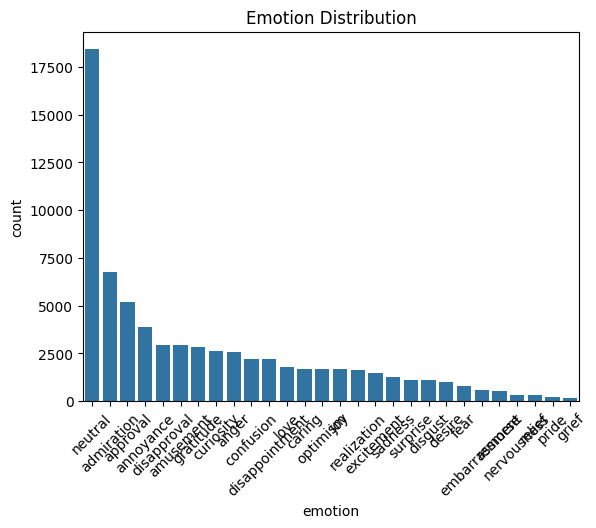

In [ ]:
sns.countplot(x=df["emotion"], order=df["emotion"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Emotion Distribution")
plt.show()

# Importing necessary libraries for text processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

**Downloading necessary NLTK resources**

**Defining stopwords and lemmatizer

In [ ]:
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Defining the text preprocessing function**

**Applying the preprocessing function to the 'text' column**

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess_text)
print(df["clean_text"].head())  # Display cleaned text

0                                            game hurt
1    sexuality grouping category make different oth...
2                                      right care fuck
3                                      man love reddit
4                             name nowhere near falcon
Name: clean_text, dtype: object


In [ ]:
display(df)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,emotion,clean_text
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,sadness,game hurt
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,admiration,sexuality grouping category make different oth...
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,right care fuck
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,love,man love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,name nowhere near falcon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,"It's about fucking time, hope this is real.",0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,annoyance,fucking time hope real
69996,This is great! Can anyone make a request with ...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,admiration,great anyone make request draw
69997,I’m sorry. Can you please explain what are the...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,curiosity,sorry please explain account order creation co...
69998,No but it should be,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,neutral,


**Conversion of Emotions to Numeric Labels**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Keep only the required columns
df = df[["clean_text", "emotion"]]

# Convert emotions to numbers
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["emotion"])

# Check mapping of labels
print(dict(enumerate(label_encoder.classes_)))  # Maps numbers to emotions

# Display dataset
df.head()

{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'neutral', 21: 'optimism', 22: 'pride', 23: 'realization', 24: 'relief', 25: 'remorse', 26: 'sadness', 27: 'surprise'}


<ipython-input-17-dc272a1532d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = label_encoder.fit_transform(df["emotion"])


,clean_text,emotion,label
0,game hurt,sadness,26
1,sexuality grouping category make different oth...,admiration,0
2,right care fuck,neutral,20
3,man love reddit,love,18
4,name nowhere near falcon,neutral,20


**Installing necessary libraries for working with transformers and datasets**

In [ ]:
pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### ModelS Training and Evaluation


###BERT model
In this section, we train a BERT model for emotion classification using the preprocessed text data. The workflow includes several key steps:

1. **Data Preparation**: We ensure that the text data is properly tokenized and converted into a format suitable for the model.
2. **Model Setup**: We load a pre-trained BERT model specifically for sequence classification and configure it for multi-class emotion classification (28 different labels in this case).
3. **Training Configuration**: We set the training parameters, including batch size, number of epochs, and evaluation strategy, to ensure the model trains effectively.
4. **Model Training**: Using the Hugging Face `Trainer` class, we train the model on the training dataset and save the best-performing model.
5. **Evaluation**: After training, we evaluate the model's performance on the test set, generating a classification report and a confusion matrix for better understanding of the model's accuracy and errors.

This process ensures that we can train and evaluate a robust model for emotion classification on the provided dataset.

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/56000 [00:00<?, ? examples/s]

Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,2.168700,2.164301
2,1.977500,2.111854
3,1.692000,2.188817


Model and tokenizer saved successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1350
           1       0.49      0.71      0.58       574
           2       0.37      0.31      0.33       487
           3       0.22      0.19      0.20       775
           4       0.31      0.15      0.20      1047
           5       0.21      0.22      0.22       326
           6       0.39      0.13      0.20       487
           7       0.26      0.08      0.13       512
           8       0.33      0.18      0.23       186
           9       0.25      0.14      0.18       439
          10       0.22      0.06      0.09       613
          11       0.28      0.28      0.28       228
          12       0.21      0.16      0.18       117
          13       0.33      0.10      0.15       315
          14       0.32      0.58      0.42       149
          15       0.64      0.76      0.70       572
          16       0.22      0.06      0.10        31
          17       0.30    

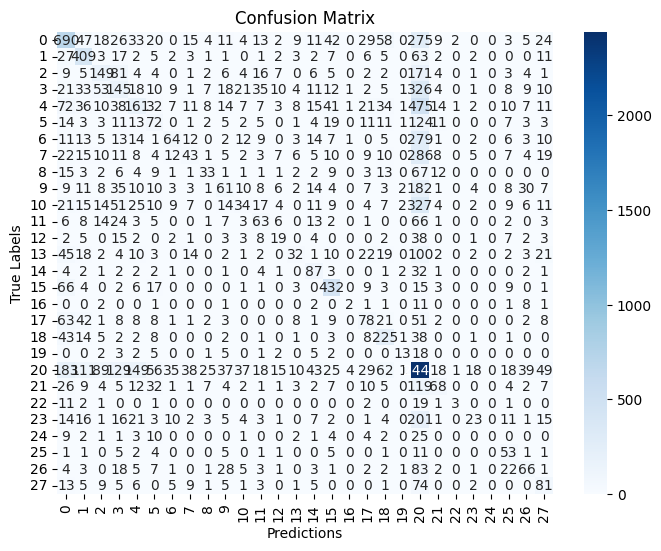

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Disable Weights & Biases (avoids API key request)
os.environ["WANDB_DISABLED"] = "true"

# Check if a GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure correct data types for columns
df["clean_text"] = df["clean_text"].astype(str)
df["label"] = df["label"].astype(int)

# Load dataset
dataset = Dataset.from_pandas(df[['clean_text', 'label']])

# Train-test split
dataset = dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization
def tokenize_function(examples):
    return tokenizer(examples["clean_text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["clean_text"])

# Prepare datasets for training
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)

# Load BERT model for classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=28)
model.to(device)

# Configure training
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Save the trained model
model.save_pretrained("./saved_model_bert")
tokenizer.save_pretrained("./saved_model_bert")

print("Model and tokenizer saved successfully!")

# Evaluate the model
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = test_dataset["label"]

# Display classification report
print(classification_report(y_true, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### **DistilBERT  Model**
In this section, we train a DistilBERT model for emotion classification using the preprocessed text data. The workflow includes several key steps:

1. **Data Preparation**: We ensure that the text data is properly tokenized and converted into a format suitable for the model.
2. **Model Setup**: We load a pre-trained DistilBERT model specifically for sequence classification and configure it for multi-class emotion classification (28 different labels in this case).
3. **Training Configuration**: We set the training parameters, including batch size, number of epochs, and evaluation strategy, to ensure the model trains effectively.
4. **Model Training**: Using the Hugging Face `Trainer` class, we train the model on the training dataset and save the best-performing model.
5. **Evaluation**: After training, we evaluate the model's performance on the test set, generating a classification report and a confusion matrix for better understanding of the model's accuracy and errors.

This process ensures that we can train and evaluate a robust model for emotion classification using DistilBERT on the provided dataset.

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/56000 [00:00<?, ? examples/s]

Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,2.161900,2.150682
2,1.987900,2.122681
3,1.738000,2.172342


Model and tokenizer saved successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1350
           1       0.50      0.71      0.59       574
           2       0.39      0.30      0.34       487
           3       0.21      0.16      0.19       775
           4       0.31      0.15      0.21      1047
           5       0.24      0.20      0.22       326
           6       0.42      0.15      0.22       487
           7       0.30      0.08      0.12       512
           8       0.35      0.18      0.23       186
           9       0.25      0.12      0.16       439
          10       0.24      0.08      0.12       613
          11       0.34      0.27      0.30       228
          12       0.21      0.18      0.19       117
          13       0.34      0.13      0.19       315
          14       0.32      0.58      0.41       149
          15       0.64      0.76      0.70       572
          16       0.33      0.03      0.06        31
          17       0.28    

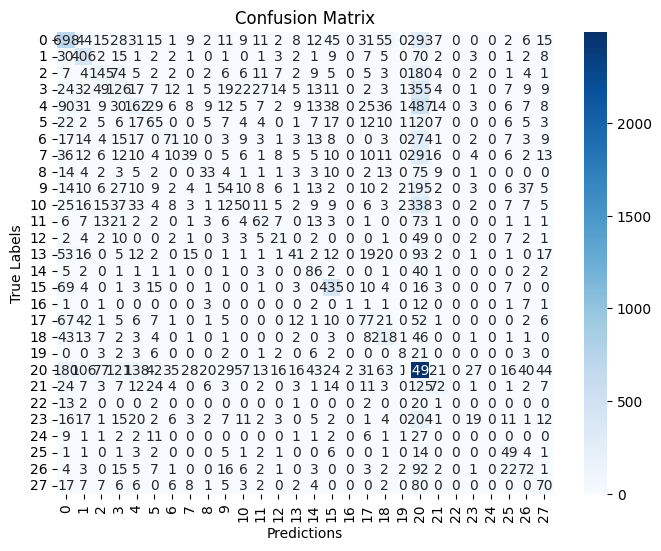

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Disable Weights & Biases (avoids API key request)
os.environ["WANDB_DISABLED"] = "true"

# Check if a GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure correct data types for columns
df["clean_text"] = df["clean_text"].astype(str)
df["label"] = df["label"].astype(int)

# Load dataset
dataset = Dataset.from_pandas(df[['clean_text', 'label']])

# Train-test split
dataset = dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization
def tokenize_function(examples):
    return tokenizer(examples["clean_text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["clean_text"])

# Prepare datasets for training
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)

# Load DistilBERT model for classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=28)
model.to(device)

# Configure training
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Save the trained model
model.save_pretrained("./saved_model_distilbert")
tokenizer.save_pretrained("./saved_model_distilbert")

print("Model and tokenizer saved successfully!")

# Evaluate the model
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = test_dataset["label"]

# Display classification report
print(classification_report(y_true, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### **RoBERTa  Model**
In this section, we train a RoBERTa model for emotion classification using the preprocessed text data. The workflow includes several key steps:

1. **Data Preparation**: We ensure that the text data is properly tokenized and converted into a format suitable for the model.
2. **Model Setup**: We load a pre-trained RoBERTa model specifically for sequence classification and configure it for multi-class emotion classification (28 different labels in this case).
3. **Training Configuration**: We set the training parameters, including batch size, number of epochs, and evaluation strategy, to ensure the model trains effectively.
4. **Model Training**: Using the Hugging Face `Trainer` class, we train the model on the training dataset and save the best-performing model.
5. **Evaluation**: After training, we evaluate the model's performance on the test set, generating a classification report and a confusion matrix for better understanding of the model's accuracy and errors.

This process ensures that we can train and evaluate a robust model for emotion classification using RoBERTa on the provided dataset.


Using device: cuda


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/56000 [00:00<?, ? examples/s]

Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,2.202900,2.209818
2,2.064700,2.136440
3,1.902000,2.126178


Model and tokenizer saved successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1350
           1       0.49      0.72      0.58       574
           2       0.32      0.34      0.33       487
           3       0.23      0.14      0.18       775
           4       0.31      0.14      0.19      1047
           5       0.22      0.20      0.21       326
           6       0.38      0.13      0.19       487
           7       0.31      0.08      0.13       512
           8       0.28      0.20      0.23       186
           9       0.21      0.13      0.16       439
          10       0.26      0.07      0.11       613
          11       0.28      0.27      0.28       228
          12       0.27      0.18      0.21       117
          13       0.30      0.17      0.22       315
          14       0.30      0.56      0.39       149
          15       0.67      0.76      0.71       572
          16       0.24      0.13      0.17        31
          17       0.27    

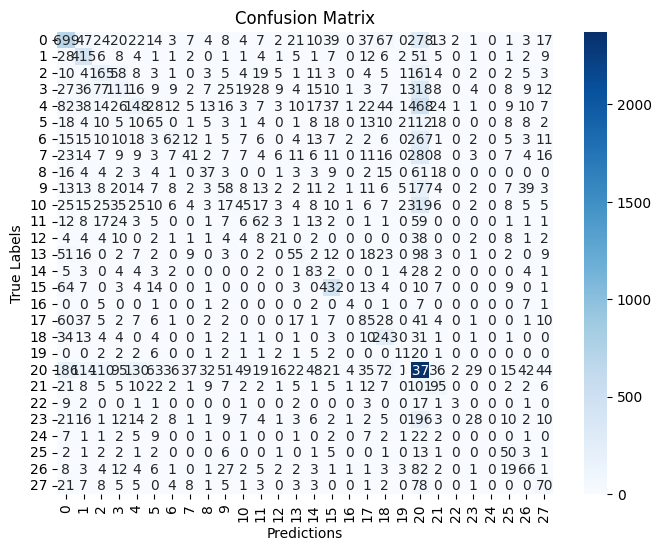

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Disable Weights & Biases (avoids API key request)
os.environ["WANDB_DISABLED"] = "true"

# Check if a GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure correct data types for columns
df["clean_text"] = df["clean_text"].astype(str)
df["label"] = df["label"].astype(int)

# Load dataset
dataset = Dataset.from_pandas(df[['clean_text', 'label']])

# Train-test split
dataset = dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

#Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenization
def tokenize_function(examples):
    return tokenizer(examples["clean_text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["clean_text"])

#Prepare datasets for training
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)

#Load RoBERTa model for classification
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=28)
model.to(device)

# Configure training
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Save the trained model
model.save_pretrained("./saved_model_roberta")
tokenizer.save_pretrained("./saved_model_roberta")

print("Model and tokenizer saved successfully!")

# Evaluate the model
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = test_dataset["label"]

# Display classification report
print(classification_report(y_true, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

###**Application**

### Installing Streamlit

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 910.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/"))

['.file-revisions-by-id', 'MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']


## Emotion Recognition Application

In this section, we create a Streamlit application that uses a pre-trained BERT model for emotion recognition. The application takes user input text and predicts the corresponding emotion based on the model's classification.

### Here’s how the process works:

1. **Model and Tokenizer Loading**:  
   The pre-trained BERT model is loaded from the saved directory, and the tokenizer is set up to process input text.

2. **Emotion Prediction**:  
   The input text is tokenized, passed through the model, and the confidence scores for each emotion are computed.

3. **Display Results**:  
   The predicted emotion is displayed along with a bar chart representing the confidence scores for all emotions.




In [ ]:
%%writefile app.py
import streamlit as st
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model and tokenizer
MODEL_PATH = "saved_model_bert"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("/content/drive/My Drive/saved_model_bert")
model.to(device)
model.eval()
tokenizer = BertTokenizer.from_pretrained("/content/drive/My Drive/saved_model_bert")

# List of emotions
EMOTIONS = ["admiration", "amusement", "anger", "annoyance", "approval", "confusion", "curiosity", "desire",
            "disappointment", "disapproval", "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
            "joy", "love", "nervousness", "neutral", "optimism", "pride", "realization", "relief", "remorse", "sadness", "surprise"]

# Prediction function
def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    scores = torch.softmax(outputs.logits, dim=1).cpu().numpy()[0]
    return scores

# Streamlit Interface
st.set_page_config(page_title="Emotion Recognition", page_icon=":guardsman:", layout="centered")
st.title("Emotion Recognition from Text")
st.markdown("""
    <style>
    .main {
        background-color: #f0f8ff;
        padding: 20px;
        border-radius: 15px;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .title {
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #4B0082;
        font-size: 36px;
        text-align: center;
    }
    .subheader {
        font-family: 'Arial', sans-serif;
        color: #333333;
        font-size: 24px;
        margin-top: 20px;
    }
    .text-area {
        background-color: #ffffff;
        border: 1px solid #dcdcdc;
        border-radius: 8px;
        padding: 10px;
    }
    .button {
        background-color: #4CAF50;
        color: white;
        border-radius: 8px;
        padding: 10px 20px;
        font-size: 18px;
        cursor: pointer;
    }
    .warning {
        color: #ff4d4d;
        font-weight: bold;
    }
    </style>
""", unsafe_allow_html=True)

st.write("Enter a text below, and the model will predict the corresponding emotion.")

# User input
with st.container():
    text_input = st.text_area("Enter your text:", height=150, key="text_input", help="Type the text here",
                             max_chars=500, placeholder="Write something to analyze the emotion.",
                             label_visibility="collapsed")
    st.markdown("<br>", unsafe_allow_html=True)
    if st.button("Analyze Emotion", key="analyze", help="Click to analyze the emotion of the text", use_container_width=True):
        if text_input:
            # Emotion prediction
            scores = predict_emotion(text_input)
            predicted_emotion = EMOTIONS[np.argmax(scores)]

            st.subheader(f"Predicted Emotion: {predicted_emotion.capitalize()}")

             # Trim scores if the number of scores exceeds the number of emotions
            scores = scores[:len(EMOTIONS)]

            # Apply the same dark color to all bars
            colors = ['darkblue'] * len(scores)

            # Display scores as a bar chart
            fig, ax = plt.subplots(figsize=(12, 6))
            sns.barplot(x=EMOTIONS, y=scores, palette=colors, ax=ax)
            ax.set_ylabel("Confidence Score")
            ax.set_xlabel("Emotions")
            ax.set_ylim(0, 1)
            ax.tick_params(axis='x', rotation=90)
            st.pyplot(fig)
        else:
            st.markdown("<p class='warning'>Please enter some text.</p>", unsafe_allow_html=True)

Overwriting app.py


## Fetching the Public IP Address

In this step, we fetch the public IP address of the system by using a simple `wget` command. This is useful for identifying the external IP address of the machine, especially when running code in cloud environments.



In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.97.133


## Running the Streamlit Application and Exposing it with LocalTunnel

In this step, we launch the Streamlit application and use LocalTunnel to expose the application on a public URL.

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.97.133:8501

  Stopping...
^C
